# Create Initial Conditions That Result in Spiral Defect Chaos
Tim Tyree<br>
6.8.2020

In [1]:
#pylab
%matplotlib inline
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pylab import imshow, show

import skimage as sk
from skimage import measure, filters

import matplotlib.pyplot as plt, numpy as np, os
from numba import njit, jit, vectorize
from PIL import Image
import imageio
# import cv2 as cv

#automate the boring stuff
from IPython import utils
import time, os, sys, re
beep = lambda x: os.system("echo -n '\\a';sleep 0.2;" * x)
if not 'nb_dir' in globals():
    nb_dir = os.getcwd()
width = 512
height = 512
channel_no = 3

#load the libraries
from lib import *
# from lib.operari import *
# from lib.ProgressBar import *
# from lib.minimal_model import *
# from lib.TexturePlot import *
# from lib.get_tips import *
# from lib.intersection import *
#TODO: use cuda via numba
# from numba import jit, njit, vectorize, cuda, uint32, f8, uint8
# from lib.contours_to_tips import *

%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


# create a 512x512x3 initial condition that's well controlled and produces SDC

## create a 'time origin' in a simple, controlled way
create a uniform, horizontal stimulus, then time step up to time = 100, at time steps of h = 0.01.  Record.

In [2]:
# make the relevant initial texture
txt = np.zeros((512,512,3))
zero_txt = txt.copy()
txt[256-32:256+32,:,0] = 0.5
txt[...,1] = 0.5
txt[...,2] = 0.5
tme = 0

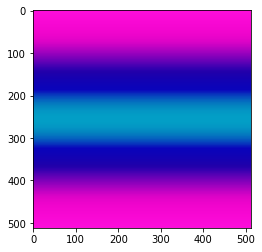

In [22]:
plt.imshow(txt)

In [20]:
h = 0.01
nsteps = 10**4
for step in range(nsteps):
    time_step(texture=txt, h = 0.01, zero_txt=zero_txt)
    tme += h
    printProgressBar(step + 1, nsteps, prefix = 'Progress:', suffix = 'Complete', length = 50)
beep(1)
print(f"the time is tme = {tme}.")

Progress: |██████████████████████████████████████████████████| 100.0% Complete
the time is tme = 100.00000000001425.


In [30]:
save_fn = f"ic_{txt.shape[1]}x{txt.shape[0]}_t={0}.npz"
print(save_fn)
np.savez_compressed(f'{nb_dir}/Data/{save_fn}', txt)

ic_512x512_t=0.npz


# Overall goal = add a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

## load test cases for pbc

In [3]:
data_dir = f'{nb_dir}/Data/ic_512x512_t=0.npz'
txt = np.load(data_dir)['arr_0']

100000


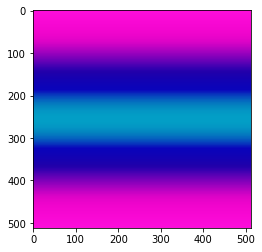

In [141]:
plt.imshow(txt)

# TODO: add a semicircle of stimulus tilted at 45º in the danger zone
- Then confirm that spiral defect chaos commenses

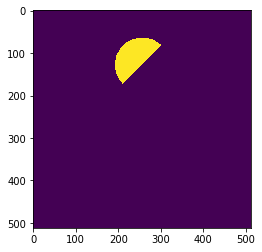

In [131]:
#make initialization conditions
deg = 45
x0 = 512/2
y0 = 512/4

#make the initialization mesh
img = 0*txt[...,0].copy()
color_left_of_line(out=img, x0=x0, y0=y0, deg = deg, value=1.)  #make left of line mesh 0 or 1
color_outside_range(out=img, x0=x0,y0=y0,r=64, val=0.0)  #make circle mesh 0 or 1
#already done: hadamard product of the two.

plt.imshow(img)

In [ ]:
# save this init + the origin

In [139]:
# from skimage import draw

# circle_coords = draw.circle(r=100, c=100, radius=100, shape=(512,512,3))
# txt[circle_coords]


# compute initial point and final point of line that goes through the circle's center
# r0 = 0; c0 = xm - dst
# r1 = txt.shape[1]-1; c1 = xm + dsb
# draw that circle
# line = draw.line(r0, c0, r1, c1)

# ym = 512/4; xm = 512/2; #same as circle center
# deg   = 45 # number of degrees semicircle is cut by
# theta = deg/180*np.pi

# #dist to top
# dtt = ym
# #dist to bottom
# dtb = txt.shape[1]-ym-1
# #use trig to get dist to sides
# dst = int(np.around(np.tan(theta)*dtt))
# dsb = int(np.around(np.tan(theta)*dtb))


# img = 0*txt[...,0].copy()
# line_x = line[0]
# color_within_range(x0=512/2,y0=512/4,r=100, out=img, val=10., width=512,height=512)


# off topic: get method from trimesh used to calculate volume

In [286]:
!pip3 install trimesh

     |████████████████████████████████| 614 kB 2.3 MB/s eta 0:00:01


In [337]:
import trimesh
# from lib.operari import *
# import inspect

In [338]:
file_name = 'ic_600x600.101.npz'
file_dir = find_files(file_name, search_path=nb_dir)
if len(file_dir)==0: raise('file not found')
# print(
file_dir=file_dir[0]
# )
# print(sys.path.exists(file_dir))

In [339]:
# generate load_mesh from .npz array
txt = np.load(file_dir)['arr_0']

In [340]:
# #make a log folder
make_log_folder(folder_name='Data/log-tmp/')

^that folder probs existed already.


In [341]:
# print(inspect.getsource(trimesh.creation.faces_to_edges))

def faces_to_edges(faces, return_index=False):
    """
    Given a list of faces (n,3), return a list of edges (n*3,2)

    Parameters
    -----------
    faces : (n, 3) int
      Vertex indices representing faces

    Returns
    -----------
    edges : (n*3, 2) int
      Vertex indices representing edges
    """
    faces = np.asanyarray(faces)

    # each face has three edges
    edges = faces[:, [0, 1, 1, 2, 2, 0]].reshape((-1, 2))

    if return_index:
        # edges are in order of faces due to reshape
        face_index = np.tile(np.arange(len(faces)),
                             (3, 1)).T.reshape(-1)
        return edges, face_index
    return edges



trimesh.base.Trimesh

In [347]:
# print(inspect.getsource(trimesh.Trimesh.))
#     trimesh.Trimesh.mass_properties
trimesh.Trimesh.volume

In [ ]:
trimesh.

# DONE: on UB: move the computational geometry ipynbs and lib from rapids-notebook/'trimesh work' over here to python/notebooks/

## TODO(when bored & w/ time): test trimesh.Trimesh.area and trimesh.Trimesh.volume can reproduce the right ratio for a sphere.

### TODO: What sized cube yields a unit volume output? Hint: what's the volume for a right tetrahedron?

### (and then) TODO: find out this "surface integral" that functionaly produces the volume of a watertight triangular mesh

# TODO: put semicircle mesh initialization functionality into a .py file in lib/
# - then, TODO: use it to locally generate initial conditions on the open science grid

In [34]:
#hint
# scipy.ndimage.rotate(input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)`
